## This is a discussion for using Quaternion math for rotations.  <br> It uses some computer science terminology: 'overloads' and 'interface"


This explanation is documentation for two python files:  q3a.py and plotPrims.py <br>

Some computer science terminology will be used to explain quaternions:'overload' and 'interface'

In this write up, quaternions use
a format of [scalar, x, y, z] and not [x,y,z,scalar].  First format is called Hamilton's and 2nd format is called JPL.
This article will use Hamilton's format.

We present quaternions as having 'overloads'.  

First overload is a quaternion that is a rotator.  In our example, rotator is for Z axis only. <br>
 [scalar, X, Y, Z] becomes  <br>
 [scalar = cos of rotating angle in radians,  <br>
   X = rotating angle about x axis = 0 radians,  <br>
   Y = rotating angle about y axis = 0 radians,  <br>
   Z = rotating angle about z axis = sin of scalar radians]  <br>
  
 Note:  This is notebook, so reader can change python code to rotate another axis:X Y Z, combination or all.  Also change angle of rotation.

 2nd overloaded is a quaternion as a 'pure quaternion';  <br>
 [scalar, X, Y, Z] becomes [0, X, Y, Z].  <br>
 Where X Y Z represents a point's coordinates in 3D space.  <br>
 
Note:  plotPrism.py is coded to handle a fixed range of X Y Z.  In next iteration it will handle a wider range.  Reader can also coordinate values of X Y Z.
 
 Procedure: quaternion rotator multiplied with pure quaternion and result
 is a 2nd pure quaternion.

 To display this rotation,
 we fill out wire frames of both pure quaternions where initial (X Y Z) is a vertex 
 of a prism and  rotated (X Y Z) is a vertex of a second prism.
 Both wire frames have a 3D origin, as a vertex (0,0,0)
 Highlighted are original and rotated points.  

 To prove that wire frames are correct, run the python code and rotate
 image along its axes.
 
 In fig below we have an image of a rotation.


In [12]:
from IPython.display import Image 
# A highlighted point displayed as a vertex in light blue prism is rotated to a 
# highlighted point, represented as a vertex in a light purple prism
# Rotation is about a 'Z' axis.

!["Result"](img/Result.png)


In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
plotprism_path = os.path.abspath(os.path.join(''))
print("plotPrism.py must be in following directory")
print(plotprism_path)
if plotprism_path not in sys.path:
    sys.path.append(plotprism_path)
    
from plotPrism import plot_prism #plotprism.py


def normalize(v, tolerance=0.00001):
    mag2 = sum(n * n for n in v)
    if abs(mag2 - 1.0) > tolerance:
        mag = math.sqrt(mag2)
        v = tuple(n / mag for n in v)
    return np.array(v)

plotPrism.py must be in following directory
C:\github\clones\Display.Quaternion.Wedge.Product\Quaternion.python


## Key math algorithms.



Hamilton solved several issues to make this work.
He devised quaternion structures, their overloads and a complex number interface for quaternion multiplication.
We have covered two quaternion overloads, that are used in rotations.

This complex number interface reduces a multiplication of quaternions to a 'pure quaternion'


## 'Complex Number Interface' to generate multiplication algorithm for quaternions

When a quaternion multiplies a 2nd quaternion, Hamilton used 'exterior product'. <br>
Quaternion 1: [a0,a1,a3,a4] <br>
Quaternion 2: [b0,b1,b2,b3] <br>

Multiplication result: <br>
a0b0 + a0b1 + a0b2+ a0b3 + <br>
a1b0 + a1b1 + a1b2+ a1b3 + <br>
a2b0 + a2b1 + a2b2+ a2b3 + <br>
a3b0 + a3b1 + a3b2+ a3b3  <br>

With a 'complex number interface' we could then reduce these multiplication results to a [X Y Z] or pure quaternion.



### Generate a  'Complex Number Interface' to get a quaternion multiplication function

A complex number interface also has three axes: i, j, k.  They interface to X,Y,Z axis.  This interface will allow us to simplify quaternion multiplication to a pure quaternion.

First we need some rules for complex number multiplication.  With this interface we will then do some substitutions.

Hamilton discovered that ijk = -1 and of course ii, jj, kk = -1.  It's not commutative.  kj neq jk. But kj eq -jk (neq is not equal)
This interface creates a table where a single complex number equals a combination of two complex numbers

ijk = -1 <br>
iijk = -i <br>
-jk = -i <br>
jk = i  Therefore kj = -i <br>

ijk = -1<br>
-ikj = -1<br>
kij = -i<br>
kkij = -k  <br>
-ij = -k
ij=k  Therefore ji = -k<br>

ijk = -1<br>
-jik = -1<br>
-jjik = -j<br>
ik = -j  Therefore ki = j<br>

Now we redo the multiplication of two quaternions<br>
Quaternion 1: [a0,a1i,a2j,a3k]<br>
Quaternion 2: [b0,b1i,b2j,b3k]<br>

 a0b0 + a0b1i + a0b2j+ a0b3k +<br>
 a1ib0 + a1ib1i + a1ib2j+ a1ib3k +<br>
 a2jb0 + a2jb1i + a2jb2j+ a2jb3k +<br>
 a3kb0 + a3kb1i + a3kb2j+ a3kb3k <br>

We restate it, by collecting complex variables together.<br>

a0b0 + (a0b1)i + (a0b2)j+ (a0b3)k +<br>
(a1b0)i + (a1b1)ii + (a1b2)ij+ (a1b3)ik +<br>
(a2b0)j + (a2b1)ji + (a2b2)jj+ (a2b3)jk +<br>
(a3b0)k + (a3b1)ki + (a3b2)kj+ (a3b3)kk <br>

Then we substitute pairs of complex variables with a single complex variable.<br>
a0b0 + (a0b1)i + (a0b2)j+ (a0b3)k +<br>
(a1b0)i + (a1b1)-1 + (a1b2)k+ (a1b3)-j +<br>
(a2b0)j + (a2b1)-k + (a2b2)-1+ (a2b3)i +<br>
(a3b0)k + (a3b1)j + (a3b2)-i+ (a3b3)-1 <br>

Next, we group by scalar or i, j, k <br>
a0b0 - (a1b1) - (a2b2) -(a3b3)   # scalars <br>
((a0b1) +a1b0) + (a2b3) - (a3b2))i  # i's<br>
((a0b2) - (a1b3) + (a2b0) + (a3b1)j  # j's<br>
((a0b3) + (a1b2) - (a2b1) +  (a3b0))k  # k's<br>

Now we have an interface for formula for our python file:

We substitute pq[0] for a0 and r[0] for b0 etc...   This will result in <br>
a pure quaternion of [Scalar, X, Y ,Z]


In [14]:

def quaternion_mult(r,pq):
    return [pq[0]*r[0]-pq[1]*r[1]-pq[2]*r[2]-pq[3]*r[3],
            pq[0]*r[1]+pq[1]*r[0]+pq[2]*r[3]-pq[3]*r[2],
            pq[0]*r[2]-pq[1]*r[3]+pq[2]*r[0]+pq[3]*r[1],
            pq[0]*r[3]+pq[1]*r[2]-pq[2]*r[1]+pq[3]*r[0]]

# pq is pure quaternion
# rq is rotator quaternion
def point_rotation_by_quaternion(pq,rq):
    r = normalize(rq)
    r_conj = [r[0],-1*r[1],-1*r[2],-1*r[3]]
    return quaternion_mult(quaternion_mult(r,pq),r_conj)

Below are our two overloaded quaternions, with their angle of rotation. <br>
These values can be changed by reader.<br>
Note that plotPrism.py, currently can only handle a narrow range of values. This will be extended on a next version of code.<br>
Note:  A formula for rotating a point (x, y) in 2D is given by: <br>

x': = x * cos (angle) - y * sin (angle) <br>
y': = y * cos (angle) + x * sin (angle) <br>

In [18]:
degrees = math.pi/180;
rot = 180*degrees;
# for rotating about an axis.
w = math.cos(rot/2.);
ax = math.sin(rot/2.);
# quaternion format is [scalar, x, y ,z]
pq = [0, 1, 2, 3]  # pure quaternion.  Scalar is zero.
rq = [w, 0, 0, ax]  # play with ax on different axis: x,y,z  Change values of w and ax.



#### We now apply rotation algorithms

In [19]:
pq2 = point_rotation_by_quaternion(pq,rq)
print(pq2)



[0.0, -0.9999999999999998, -2.0, 3.0]


### We now prep for display purposes

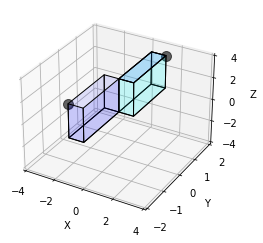

In [20]:
# Fill in a start prism wire frame, using point and a 3D origin as vertices
# Highlight point as vertex

p1 = np.array([0.,0.,0.])
p2 = np.array([pq[1],0.,0.])
p3 = np.array([0.,pq[2],0.])
p4 = np.array([0.,0.,pq[3]])

prism1 = [
    (p1[0],p1[1],p1[2]), (p2[0],p2[1],p2[2]), (p3[0],p3[1],p3[2]), (p4[0],p4[1],p4[2])
]

# Fill in a rotated prism wire frame, using point and a 3D origin as vertices
# Highlight point as vertex

p1A = np.array([0.,0.,0.])
p2A = np.array([pq2[1],0.,0.])
p3A = np.array([0.,pq2[2],0.])
p4A = np.array([0.,0.,pq2[3]])

prism2 = [
    (p1A[0],p1A[1],p1A[2]), (p2A[0],p2A[1],p2A[2]), (p3A[0],p3A[1],p3A[2]), (p4A[0],p4A[1],p4A[2])
]

# to prove that plot is correct, you need to rotate image along its axes.

plot_prism(prism1,prism2)

This image can be rotated by running files q3a.py and plotPrism.py in a python ide like 'Sublime Text'

Notes:  This point being rotated could be a significant point of a geometric object.  For a sphere, it could represent a center. Quaternion rotation is meant to preserve shape.
        